In [1]:
library(keras)
library(tidyverse)
library(magrittr)
library(text2vec)
library(tokenizers)
library(glmnet)
library(doParallel)
library(tm)
library(caret)
library(utiml)
library(pROC)
library(kerasR)
registerDoParallel(4)

Warning message:
“package ‘keras’ was built under R version 3.4.4”Warning message:
“package ‘tidyverse’ was built under R version 3.4.2”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.4.3”Warning message:
“package ‘tidyr’ was built under R version 3.4.2”Warning message:
“package ‘purrr’ was built under R version 3.4.2”Warning message:
“package ‘dplyr’ was built under R version 3.4.2”Warning message:
“package ‘forcats’ was built under R version 3.4.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names



In [2]:
data_set <- read.csv("DATA/train.csv")
targets <- c("toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate")

In [3]:
set.seed(42)
smp_size <- floor(0.80 * nrow(data_set))
train_ind <- sample(seq_len(nrow(data_set)), size = smp_size)
test <- data_set[-train_ind, ]
train <- data_set[train_ind, ]

In [4]:
word_vector_size <- 50
voc_lenght <- 20000
max_words <- 200

In [5]:
y_train <- train %>%
    select(-comment_text) %>%
    select(-id)

In [6]:
tokenizer <- text_tokenizer(num_words = voc_lenght, filters = "!\"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n", lower = TRUE, split = " ", char_level = FALSE, oov_token = NULL)

train_comment <- train %$%
    str_to_lower(comment_text) %>%
    str_replace_all("[^[:alpha:]]", " ") %>%
    str_replace_all("\\s+", " ") %>%
    gsub("\\b\\w{1}\\s","", .) #Remove words with lengh less than 2

In [7]:
test_comment <- test %$%
    str_to_lower(comment_text) %>%
    str_replace_all("[^[:alpha:]]", " ") %>%
    str_replace_all("\\s+", " ") %>%
    gsub("\\b\\w{1}\\s","", .) #Remove words with lengh less than 2

In [8]:
fit_text_tokenizer(tokenizer, train_comment)
tokenized_train <- texts_to_sequences(tokenizer, train_comment)
tokenized_test <- texts_to_sequences(tokenizer, test_comment)

In [11]:
typeof(tokenized_train)
typeof(tokenized_test)

[1] "list"

[1] "list"

In [10]:
X_t <- pad_sequences(tokenized_train, maxlen = max_words, dtype = "int32", padding = "pre",
  truncating = "pre", value = 0)
X_te <- pad_sequences(tokenized_test, maxlen = max_words, dtype = "int32", padding = "pre",
  truncating = "pre", value = 0)

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): ValueError: `sequences` must be a list of iterables. Found non-iterable: 1086

Detailed traceback: 
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/preprocessing/sequence.py", line 59, in pad_sequences
    'Found non-iterable: ' + str(x))



In [30]:
input <- layer_input(shape = c(max_words))

In [31]:
x <- layer_embedding(input, voc_lenght, 128)

In [34]:
x <- layer_lstm(x, 60, return_sequences = T)

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

Detailed traceback: 
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/layers/recurrent.py", line 499, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/engine/topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/layers/recurrent.py", line 461, in build
    self.cell.build(step_input_shape)
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/layers/recurrent.py", line 1860, in build
    constraint=self.bias_constraint)
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/engine/topology.py", line 413, in add_weight
    weight = K.variable(initializer(shape),
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/layers/recurrent.py", line 1852, in bias_initializer
    self.bias_initializer((self.units * 2,), *args, **kwargs),
  File "/Users/antoinegargot/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 1881, in concatenate
    return tf.concat([to_dense(x) for x in tensors], axis)
  File "/Users/antoinegargot/.local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1075, in concat
    dtype=dtypes.int32).get_shape(
  File "/Users/antoinegargot/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 669, in convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
  File "/Users/antoinegargot/.local/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py", line 176, in _constant_tensor_conversion_function
    return constant(v, dtype=dtype, name=name)
  File "/Users/antoinegargot/.local/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py", line 165, in constant
    tensor_util.make_tensor_proto(value, dtype=dtype, shape=shape, verify_shape=verify_shape))
  File "/Users/antoinegargot/.local/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py", line 367, in make_tensor_proto
    _AssertCompatible(values, dtype)
  File "/Users/antoinegargot/.local/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py", line 302, in _AssertCompatible
    (dtype.name, repr(mismatch), type(mismatch).__name__))



In [ ]:
x <- layer_dense(input, 128, activation = NULL, use_bias = TRUE,
  kernel_initializer = "glorot_uniform", bias_initializer = "zeros",
  kernel_regularizer = NULL, bias_regularizer = NULL,
  activity_regularizer = NULL, kernel_constraint = NULL,
  bias_constraint = NULL, input_shape = NULL, batch_input_shape = NULL,
  batch_size = NULL, dtype = NULL, name = NULL, trainable = NULL,
  weights = NULL)

In [ ]:
layer_dropout(object, rate, noise_shape = NULL, seed = NULL,
  batch_size = NULL, name = NULL, trainable = NULL, weights = NULL)


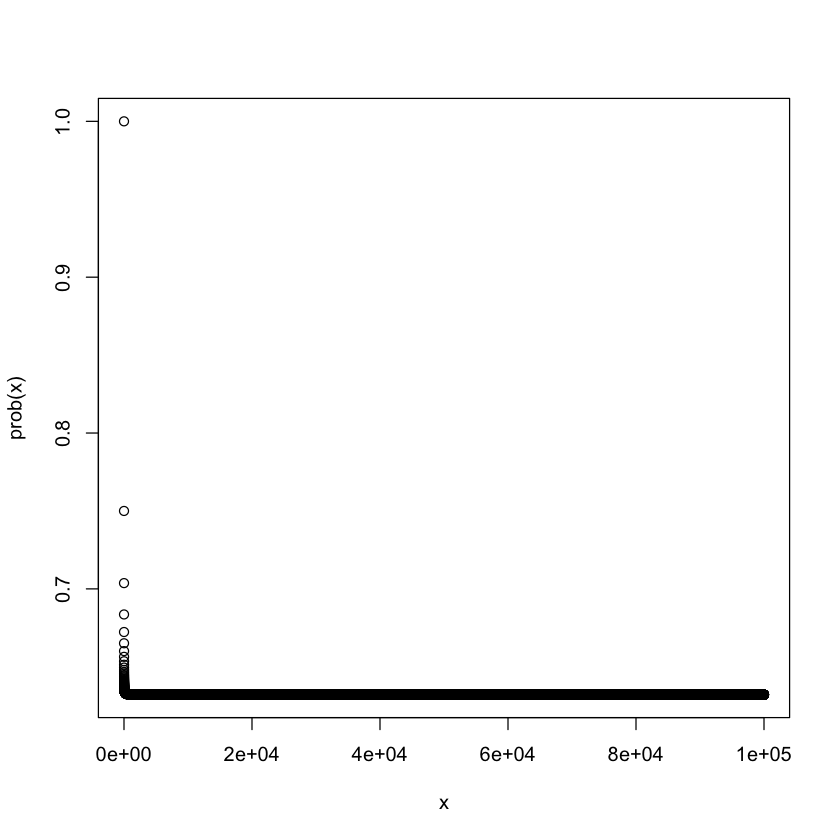

In [37]:
prob = function(n) return(1 - (1 - 1/n)^n)
x = 1:1e+05
plot(x, prob(x))

In [43]:
store=rep(NA, 10000)
for(i in 1:10000){
    store[i]=sum(sample(1:100, rep=TRUE)==4)>0
}
mean(store) 

[1] 0.6302